In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import reedsolo as rs
from reedsolo import ReedSolomonError

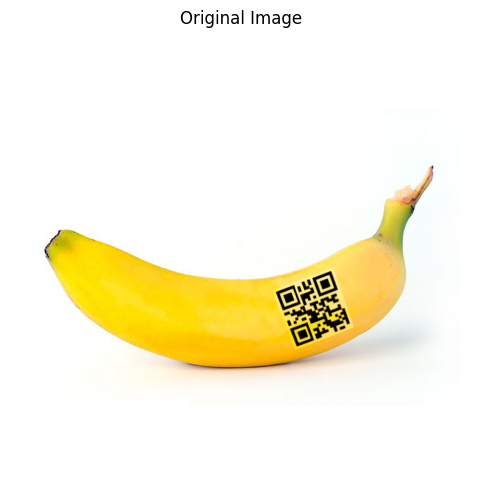

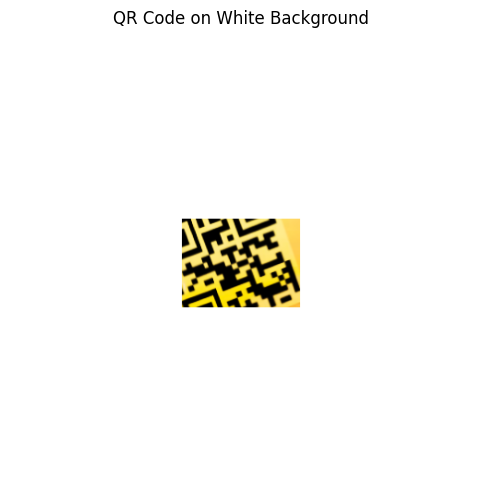

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot_image(img, title="Image", cmap=None):
    plt.figure(figsize=(6, 6))
    if len(img.shape) == 2 or img.shape[2] == 1:  # Check if the image is grayscale
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for plotting
    plt.title(title)
    plt.axis('off')
    plt.show()

image_path = '14-BANANAAA!!!.png'
image = cv2.imread(image_path)
plot_image(image, "Original Image")

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, thresh_image = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY_INV)

contours, _ = cv2.findContours(thresh_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


qr_contour = max(contours, key=cv2.contourArea)


x, y, w, h = cv2.boundingRect(qr_contour)


cropped_qr = image[y:y+h, x:x+w]

# Create a white background and place the QR code in the middle
background_size = (500, 500, 3)
background = np.ones(background_size, dtype=np.uint8) * 255
x_offset = (background_size[1] - w) // 2
y_offset = (background_size[0] - h) // 2
background[y_offset:y_offset+h, x_offset:x_offset+w] = cropped_qr

plot_image(background, "QR Code on White Background")


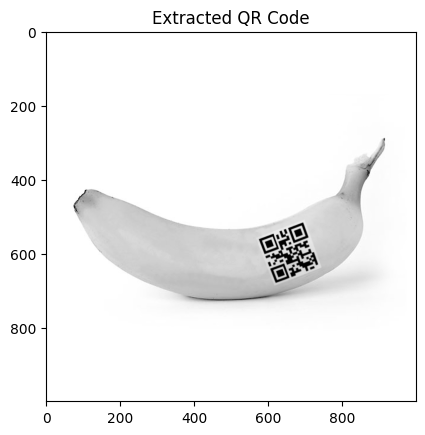

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extract_qr_code(file_path):
    # Load the image
    img = cv2.imread(file_path)
    if img is None:
        print("Error: Image not found or the path is incorrect.")
        return

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply threshold to isolate the QR code
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Assuming the QR code is the largest square-like contour
    max_area = 0
    best_cnt = None
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > max_area:
            peri = cv2.arcLength(cnt, True)
            approx = cv2.approxPolyDP(cnt, 0.02 * peri, True)
            if len(approx) == 4:  # Check if the contour is a rectangle
                max_area = area
                best_cnt = cnt

    if best_cnt is not None:
        # Get bounding box of the largest rectangle-like contour
        x, y, w, h = cv2.boundingRect(best_cnt)
        qr_code = gray[y:y+h, x:x+w]

        # Display the result using matplotlib
        plt.imshow(qr_code, cmap='gray')
        plt.title('Extracted QR Code')
        plt.show()

        return qr_code
    else:
        print("No QR code found.")
        return None

# Path to the uploaded image
file_path = '14-BANANAAA!!!.png'
extracted_qr_code = extract_qr_code(file_path)


In [4]:
start_row = -1
start_col = -1
end_row = -1
end_col = -1

for row_index, row in enumerate(extracted_qr_code):
    for pixel in row:
        if pixel != 255:
            start_row = row_index
            break
    if start_row != -1:
        break

for row_index, row in enumerate(extracted_qr_code[::-1]):
    for pixel in row:
        if pixel != 255:
            end_row = extracted_qr_code.shape[0] - row_index
            break
    if end_row != -1:
        break

for col_index, col in enumerate(cv2.transpose(extracted_qr_code)):
    for pixel in col:
        if pixel != 255:
            start_col = col_index
            break
    if start_col != -1:
        break

for col_index, col in enumerate(cv2.transpose(extracted_qr_code)[::-1]):
    for pixel in col:
        if pixel != 255:
            end_col = extracted_qr_code.shape[1] - col_index
            break
    if end_col != -1:
        break

print(start_row, end_row, start_col, end_col)

167 811 64 978


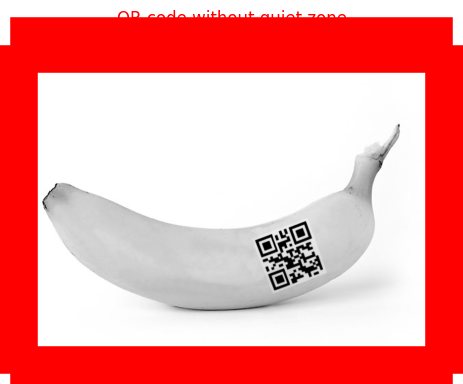

In [5]:
qr_no_quiet_zone = extracted_qr_code[start_row:end_row, start_col:end_col]
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
fig.get_axes()[0].spines[:].set_color('red');
fig.get_axes()[0].spines[:].set_linewidth(40);
fig.get_axes()[0].spines[:].set_position(("outward", 20))
plt.title('QR code without quiet zone', y = 1.15, color='red');
plt.imshow(qr_no_quiet_zone, cmap='gray');